In [119]:
import os
import csv
import glob
import numpy as np
from PIL import Image
import xml.etree.ElementTree as ET

In [5]:
src_images = glob.glob("../eastenders/trecvid_2019/topics/tv19.person.examples.images/*.src.png")
mask_images = glob.glob("../eastenders/trecvid_2019/topics/tv19.person.examples.images/*.mask.png")

In [57]:
src_images

['../eastenders/trecvid_2019/topics/tv19.person.examples.images/bradley.1.src.png',
 '../eastenders/trecvid_2019/topics/tv19.person.examples.images/bradley.2.src.png',
 '../eastenders/trecvid_2019/topics/tv19.person.examples.images/bradley.3.src.png',
 '../eastenders/trecvid_2019/topics/tv19.person.examples.images/bradley.4.src.png',
 '../eastenders/trecvid_2019/topics/tv19.person.examples.images/denise.1.src.png',
 '../eastenders/trecvid_2019/topics/tv19.person.examples.images/denise.2.src.png',
 '../eastenders/trecvid_2019/topics/tv19.person.examples.images/denise.3.src.png',
 '../eastenders/trecvid_2019/topics/tv19.person.examples.images/denise.4.src.png',
 '../eastenders/trecvid_2019/topics/tv19.person.examples.images/dot.1.src.png',
 '../eastenders/trecvid_2019/topics/tv19.person.examples.images/dot.2.src.png',
 '../eastenders/trecvid_2019/topics/tv19.person.examples.images/dot.3.src.png',
 '../eastenders/trecvid_2019/topics/tv19.person.examples.images/dot.4.src.png',
 '../eastend

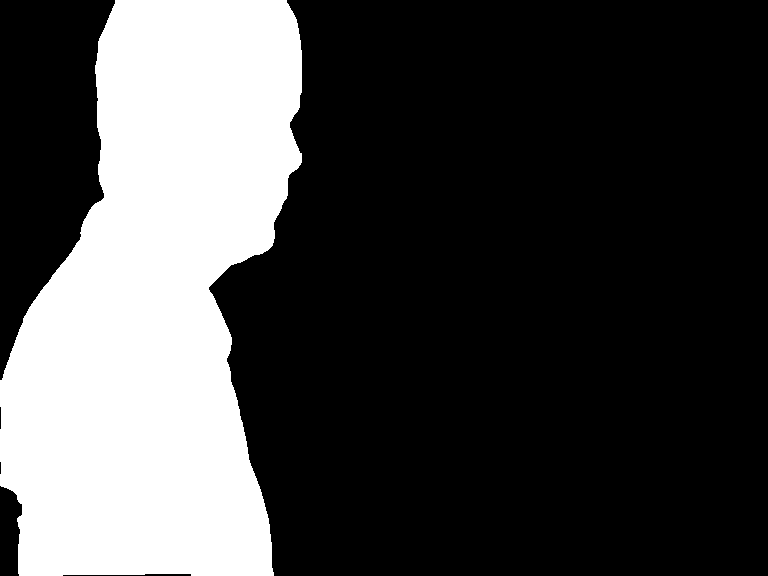

In [60]:
Image.open(mask_images[17])

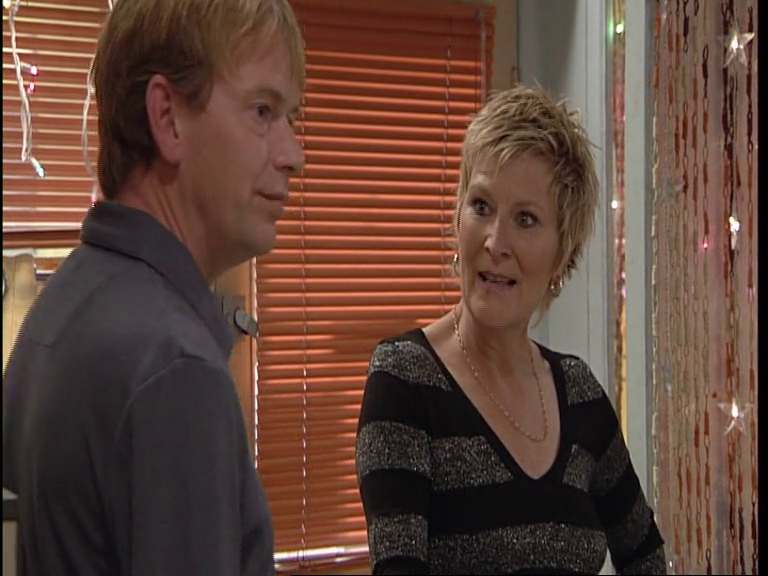

In [59]:
Image.open(src_images[17])

In [172]:
tree = ET.parse("/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/topics/ins.auto.topics.2019.xml")
root = tree.getroot()

In [173]:
for child in root:
    print(child.attrib)

{'person': 'Max', 'action': 'holding_glass', 'num': '9249'}
{'person': 'Ian', 'action': 'holding_glass', 'num': '9250'}
{'person': 'Pat', 'action': 'holding_glass', 'num': '9251'}
{'person': 'Denise', 'action': 'holding_glass', 'num': '9252'}
{'person': 'Pat', 'action': 'sit_on_couch', 'num': '9253'}
{'person': 'Denise', 'action': 'sit_on_couch', 'num': '9254'}
{'person': 'Ian', 'action': 'holding_phone', 'num': '9255'}
{'person': 'Phil', 'action': 'holding_phone', 'num': '9256'}
{'person': 'Jane', 'action': 'holding_phone', 'num': '9257'}
{'person': 'Pat', 'action': 'drinking', 'num': '9258'}
{'person': 'Ian', 'action': 'open_door_enter', 'num': '9259'}
{'person': 'Dot', 'action': 'open_door_enter', 'num': '9260'}
{'person': 'Max', 'action': 'shouting', 'num': '9261'}
{'person': 'Phil', 'action': 'shouting', 'num': '9262'}
{'person': 'Ian', 'action': 'eating', 'num': '9263'}
{'person': 'Dot', 'action': 'eating', 'num': '9264'}
{'person': 'Max', 'action': 'crying', 'num': '9265'}
{'per

In [181]:
with open("/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/query/action_labels.csv", "r") as f:
        reader = csv.reader(f, delimiter=" ")
        action_label_dict = {r[0]: r[1] for r in reader}
print(action_label_dict)

{'holding_glass': '1', 'sit_on_couch': '2', 'holding_phone': '3', 'carrying_bag': '4', 'drinking': '5', 'open_door_enter': '6', 'shouting': '7', 'eating': '8', 'crying': '9', 'laughing': '10', 'open_door_leave': '11', 'go_up_down_stairs': '12', 'holding_paper': '13', 'holding_cloth': '14', 'smoking_cigarette': '15', 'close_door_wo_leaving': '16', 'kissing': '17', 'hugging': '18', 'stand_talk_door': '19', 'hold_object': '20', 'hold_hands': '21', 'hold_money': '22', 'get_dressed': '23', 'hold_plate': '24', 'hold_baby': '25'}


In [54]:
nums_dict = {child.attrib["num"]: 0 for child in root}

In [55]:
gt_nums = []
with open("../eastenders/trecvid_2019/ins.search.qrels.tv19", "r") as f:
    lines = f.readlines()
    for l in lines:
        nums_dict[l.split()[0]] += 1

In [56]:
nums_dict

{'9249': 4360,
 '9250': 4827,
 '9251': 4178,
 '9252': 4332,
 '9253': 4086,
 '9254': 4461,
 '9255': 5153,
 '9256': 5309,
 '9257': 4979,
 '9258': 4894,
 '9259': 5322,
 '9260': 4350,
 '9261': 4185,
 '9262': 4766,
 '9263': 5801,
 '9264': 4895,
 '9265': 4677,
 '9266': 4565,
 '9267': 4697,
 '9268': 4924,
 '9269': 4505,
 '9270': 4543,
 '9271': 5478,
 '9272': 5268,
 '9273': 4816,
 '9274': 3847,
 '9275': 4550,
 '9276': 4905,
 '9277': 4589,
 '9278': 4337}

In [68]:
queries

[{'person': 'Max', 'action': 'holding_glass', 'num': '9249'},
 {'person': 'Ian', 'action': 'holding_glass', 'num': '9250'},
 {'person': 'Pat', 'action': 'holding_glass', 'num': '9251'},
 {'person': 'Denise', 'action': 'holding_glass', 'num': '9252'},
 {'person': 'Pat', 'action': 'sit_on_couch', 'num': '9253'},
 {'person': 'Denise', 'action': 'sit_on_couch', 'num': '9254'},
 {'person': 'Ian', 'action': 'holding_phone', 'num': '9255'},
 {'person': 'Phil', 'action': 'holding_phone', 'num': '9256'},
 {'person': 'Jane', 'action': 'holding_phone', 'num': '9257'},
 {'person': 'Pat', 'action': 'drinking', 'num': '9258'},
 {'person': 'Ian', 'action': 'open_door_enter', 'num': '9259'},
 {'person': 'Dot', 'action': 'open_door_enter', 'num': '9260'},
 {'person': 'Max', 'action': 'shouting', 'num': '9261'},
 {'person': 'Phil', 'action': 'shouting', 'num': '9262'},
 {'person': 'Ian', 'action': 'eating', 'num': '9263'},
 {'person': 'Dot', 'action': 'eating', 'num': '9264'},
 {'person': 'Max', 'action

In [63]:
query_videos = glob.glob("/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/topics/actions.examples/clip*.mp4")

In [76]:
q_actions = list(set([q["action"] for q in queries]))

In [74]:
action_dict = {}
with open("../eastenders/action_labal_num.csv", "r") as f:
    lines = f.readlines()
    for l in lines:
        a = l.split()
        action_dict[a[0]] = a[1] 

In [75]:
action_dict

{'holding_glass': '1',
 'sit_on_couch': '2',
 'holding_phone': '3',
 'drinking': '4',
 'open_door_enter': '5',
 'shouting': '6',
 'eating': '7',
 'crying': '8',
 'laughing': '9',
 'open_door_leave': '10',
 'go_up_down_stairs': '11',
 'carrying_bag': '12',
 'kissing': '13',
 'hugging': '14',
 'stand_talk_door': '15',
 'close_door_wo_leaving': '16'}

In [77]:
for a in q_actions:
    print(action_dict[a])

11
12
1
10
9
6
7
5
4
8
3
2


In [78]:
q_actions

['go_up_down_stairs',
 'carrying_bag',
 'holding_glass',
 'open_door_leave',
 'laughing',
 'shouting',
 'eating',
 'open_door_enter',
 'drinking',
 'crying',
 'holding_phone',
 'sit_on_couch']

In [84]:
label_num = 0
label_dict = {}
original_videos = []
with open("../eastenders/trecvid_2019/topics/ins.action.topics", "r") as f:
    lines = f.readlines()
    for l in lines:
        label, clip = l.split()
        video = "/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/topics/actions.examples/{}.mp4".format(clip)
        if label in label_dict:
            num = label_dict[label]
        else:
            label_num += 1
            num = label_num
            label_dict[label] = label_num
        original_videos.append([video, num])

In [104]:
original_videos = [[i + 1, original_videos[i][0], original_videos[i][1]] for i in range(len(original_videos))]

In [89]:
label_list = [[label, label_dict[label]] for label in label_dict]

In [106]:
with open("/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/query/original_videos.csv", "w") as f:
    writer = csv.writer(f, delimiter=" ")
    writer.writerows(original_videos)

In [90]:
with open("../eastenders/trecvid_2019/query/action_labels.csv", "w") as f:
    writer = csv.writer(f, delimiter=" ")
    writer.writerows(label_list)

In [91]:
queries

[{'person': 'Max', 'action': 'holding_glass', 'num': '9249'},
 {'person': 'Ian', 'action': 'holding_glass', 'num': '9250'},
 {'person': 'Pat', 'action': 'holding_glass', 'num': '9251'},
 {'person': 'Denise', 'action': 'holding_glass', 'num': '9252'},
 {'person': 'Pat', 'action': 'sit_on_couch', 'num': '9253'},
 {'person': 'Denise', 'action': 'sit_on_couch', 'num': '9254'},
 {'person': 'Ian', 'action': 'holding_phone', 'num': '9255'},
 {'person': 'Phil', 'action': 'holding_phone', 'num': '9256'},
 {'person': 'Jane', 'action': 'holding_phone', 'num': '9257'},
 {'person': 'Pat', 'action': 'drinking', 'num': '9258'},
 {'person': 'Ian', 'action': 'open_door_enter', 'num': '9259'},
 {'person': 'Dot', 'action': 'open_door_enter', 'num': '9260'},
 {'person': 'Max', 'action': 'shouting', 'num': '9261'},
 {'person': 'Phil', 'action': 'shouting', 'num': '9262'},
 {'person': 'Ian', 'action': 'eating', 'num': '9263'},
 {'person': 'Dot', 'action': 'eating', 'num': '9264'},
 {'person': 'Max', 'action

In [92]:
person_num = 0
person_dict = {}
for q in queries:
    if q["person"] not in person_dict:
        person_num += 1
        person_dict[q["person"]] = person_num

In [97]:
person_list = [[p, person_dict[p]] for p in person_dict]

In [99]:
person_list
with open("../eastenders/trecvid_2019/query/person_labels.csv", "w") as f:
    writer = csv.writer(f, delimiter=" ")
    writer.writerows(person_list)

In [136]:
person_list

[['Max', 1],
 ['Ian', 2],
 ['Pat', 3],
 ['Denise', 4],
 ['Phil', 5],
 ['Jane', 6],
 ['Dot', 7],
 ['Jack', 8],
 ['Stacey', 9],
 ['Bradley', 10]]

In [112]:
with open("/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/query/person_videos.csv", "r") as f:
    reader = csv.reader(f, delimiter=" ")
    person_videos = [row for row in reader]

In [115]:
person_videos

[[1,
  '2',
  '/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/detected_query_videos/clip1_011_id_8.mp4',
  ''],
 [2,
  '3',
  '/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/detected_query_videos/clip1_012_id_14.mp4',
  ''],
 [3,
  '4',
  '/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/detected_query_videos/clip1_013_id_20.mp4',
  ''],
 [4,
  '5',
  '/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/detected_query_videos/clip1_014_id_24.mp4',
  ''],
 [5,
  '7',
  '/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/detected_query_videos/clip2_021_id_41.mp4',
  ''],
 [6,
  '10',
  '/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/detected_query_videos/clip2_024_id_51.mp4',
  ''],
 [7,
  '11',
  '/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/detected_query_videos/clip2_025_id_53.mp4',
  ''],
 [8,


In [114]:
for i in range(len(person_videos)):
    person_videos[i][0] = i + 1

In [116]:
with open("/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/query/person_videos.csv", "w") as f:
    writer = csv.writer(f, delimiter=" ")
    writer.writerows(person_videos)

In [121]:
dataset_dir = "/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/query/"
fvs_file = os.path.join(dataset_dir, "feature.npy")
labels_file = os.path.join(dataset_dir, "label.npy")
fvs = np.load(fvs_file)
labels = np.load(labels_file)

In [131]:
mean_fvs = []
for i in range(np.min(labels[:, 1]), np.max(labels[:, 1])+1):
    mean_fvs.append(np.mean(fvs[np.where(labels[:, 1] == i)], axis=0))

In [155]:
mean_fvs = np.array(mean_fvs)
np.save("/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/query/acttion_features.npy", mean_fvs)

In [139]:
person_images = glob.glob("/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/topics/tv19.person.examples.images/*.src.png")

In [145]:
people = [os.path.basename(img)[:-10] for img in person_images]

In [153]:
person_list = sorted(list(set(people)))
person_list = [[person_list[i], i+1] for i in range(len(person_list))]
with open("/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/query/person_labels.csv", "w") as f:
    writer = csv.writer(f, delimiter=" ")
    writer.writerows(person_list)

In [154]:
person_list

[['bradley', 1],
 ['denise', 2],
 ['dot', 3],
 ['heather', 4],
 ['ian', 5],
 ['jack', 6],
 ['jane', 7],
 ['max', 8],
 ['pat', 9],
 ['phil', 10],
 ['sean', 11],
 ['shirley', 12],
 ['stacey', 13]]

In [167]:
with open("/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/query/original_videos.csv", "r") as f:
    reader = csv.reader(f, delimiter=" ")
    original_video_dict = {idx: [path, gt] for idx, path, gt in reader}
    
with open("/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/query/person_videos.csv", "r") as f:
    reader = csv.reader(f, delimiter=" ")
    person_video_list = [r for r in reader]


In [168]:
features = []
idx = 1
for person_video_idx, original_video_idx, person_video_path, person_label in person_video_list:
    features.append([
        idx,
        original_video_idx,
        person_video_idx,
        idx - 1,
        "",
        person_video_path,
        original_video_dict[original_video_idx][1],
        ""
    ])
    idx += 1

In [170]:
with open("/net/per610a/export/das18a/satoh-lab/share/datasets/eastenders/trecvid_2019/query/features.csv", "w") as f:
    writer = csv.writer(f, delimiter=" ")
    writer.writerows(features)